# Representing the 16 Gamma Matrices with the 16 Possible Quaternion Products

The 16 gamma matrices play a critical role in modern approaches to relativistic quantum field theory. It is doubtful many can recall the details of this collection. Pop quiz: write down a 4x4 matrix representation of $\gamma^0$ through $\gamma^5$, recalling there is no $\gamma^4$. Nearly all professionals would fail the pop quiz, but would not be concerned as it is easy enough to look up.

Is there an approach to the gamma matrices that use real-valued space-time number and space-time number series? The work of three people from Mexico, J. López-Bonilla, L. Rosales-Roldán, and A. Zúñiga-Segundo, in the the early 2000s, made the path clear: one can map all 16 possible quaternion triple products with two sets of 1, i, j, and k, on the outside can be mapped to the 16 gamma matrices.

This Jupyter notebook takes their work and makes it concrete.

Load the needed libraries.

In [1]:
%%capture
%matplotlib inline
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import math
import unittest

# To get equations the look like, well, equations, use the following.
from sympy.interactive import printing
printing.init_printing(use_latex=True)
from IPython.display import display

# Tools for manipulating quaternions.
from Qs import *

from IPython.core.display import display, HTML, Math, Latex
display(HTML("<style>.container { width:100% !important; }</style>"))

Put all 16 gamma matrices in a dictionary.

In [2]:
i = sp.I
γs = {
"I":    sp.Matrix([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]]),
"γ0":   sp.Matrix([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, -1, 0], [0, 0, 0, -1]]),
"γ1":   sp.Matrix([[0, 0, 0, 1], [0, 0, 1, 0], [0, -1, 0, 0], [-1, 0, 0, 0]]),
"γ2":   sp.Matrix([[0, 0, 0, -i], [0, 0, i, 0], [0, i, 0, 0], [-i, 0, 0, 0]]),
"γ3":   sp.Matrix([[0, 0, 1, 0], [0, 0, 0, -1], [-1, 0, 0, 0], [0, 1, 0, 0]]), 
"γ5":   sp.Matrix([[0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0], [0, 1, 0, 0]]),
"γ0γ5": sp.Matrix([[0, 0, 1, 0], [0, 0, 0, 1], [-1, 0, 0, 0], [0, -1, 0, 0]]),
"γ1γ5": sp.Matrix([[0, 1, 0, 0], [1, 0, 0, 0], [0, 0, 0, -1], [0, 0, -1, 0]]),
"γ2γ5": sp.Matrix([[0, -i, 0, 0], [i, 0, 0, 0], [0, 0, 0, i], [0, 0, -i, 0]]),
"γ3γ5": sp.Matrix([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]]),
"σ01":  sp.Matrix([[0, 0, 0, i], [0, 0, i, 0], [0, i, 0, 0], [i, 0, 0, 0]]),
"σ02":  sp.Matrix([[0, 0, 0, 1], [0, 0, -1, 0], [0, 1, 0, 0], [-1, 0, 0, 0]]),
"σ03":  sp.Matrix([[0, 0, i, 0], [0, 0, 0, -i], [i, 0, 0, 0], [0, -i, 0, 0]]),
"σ12":  sp.Matrix([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, 1, 0], [0, 0, 0, -1]]),
"σ23":  sp.Matrix([[0, 1, 0, 0], [1, 0, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0]]),
"σ31":  sp.Matrix([[0, -i, 0, 0], [i, 0, 0, 0], [0, 0, 0, -i], [0, 0, i, 0]])
}

The matrices $\gamma^0$, $\gamma^1$, $\gamma^2$, and $\gamma^3$, can be used to create the Clifford algebra $Cl_{1, 3}(\mathbb{R})$. All the usual discussion about these matrices is on their math properties and alternative representations.

My goal is to create a map between one of many complex-valued representations of 16 gamma matrices and 16 real-valued space-time number triplet operations. There is already arbitrariness in the above dictionary because for example $\sigma^{ij}=-\sigma^{ji}$. I chose a convention of lower number to higher number, but could have done it the other way. The space-time triples could use positive or negative triples. I use the positive convention.

A matrix is an operator in quantum field theory. As an operator, it cannot be observed directly. After all, an operator needs to operate on something, specifically a quantum state like a ket vector. For reasons I do not understand, people do not see what happens to a simple 4-vector that gets acted on by these operators.

It should be noted that a real-valued space-time number dictionary is being created that multiplies any imaginary value by _-i_.

In [3]:
# Symbolic manipulation
t, x, y, z = sp.symbols("t x y z")
txyz = sp.Matrix([t, x, y, z])
gamma_txyz = {}

for name, matrix in γs.items():
    txyz_matrix = sp.Transpose(txyz) * matrix
    
    no_i = []
    for index in range(0, 4):
        part = txyz_matrix[index]
        if part.subs({t:1, x:1, y:1, z:1}).is_imaginary:
            part *= -sp.I
        no_i.append(part)
    gamma_txyz[name] = Q(no_i)
    print(f"{name}")
    display(txyz_matrix)

I


γ0


γ1


γ2


γ3


γ5


γ0γ5


γ1γ5


γ2γ5


γ3γ5


σ01


σ02


σ03


σ12


σ23


σ31


What is going on here? I call it the aggressive shuffle of information. Notice how each variable occurs 4 times in each of the 4 positions. In three quarters of the cases, half the time with positive signs, half with negative signs. Gamma matrices are used in calculations of relativistic quantum mechanics, the results from atom smashers like the LHC. This is a  subject that can calculate all possible ways particles can interact, including both particles going forward in time as well as antiparticles going backward in time. The gamma matrices appear to provide a means for a complete survey of possibilities.

Can all possible space-time triples do a similar task, up to factors of i?

In [4]:
q_txyz = Q([t, x, y, z])
q4 = {"1": q1(), "i": qi(), "j": qj(), "k": qk()}

same_count = 0

for pre_label, pre_q in q4.items():
    for post_label, post_q in q4.items():
        qtq = product(product(pre_q, q_txyz), post_q)
        print(f"{pre_label} q {post_label}\n{qtq}")
        
        for gamma, matrix_q in gamma_txyz.items():
            if equal(matrix_q, qtq):
                same_count += 1
                print(f"match for: {gamma}")
            
print(f"Number that are the same as matrix approach: {same_count}")

1 q 1
(1.0*t, 1.0*x, 1.0*y, 1.0*z) 1xQx1
match for: I
1 q i
(-1.0*x, 1.0*t, 1.0*z, -1.0*y) 1xQxi
1 q j
(-1.0*y, -1.0*z, 1.0*t, 1.0*x) 1xQxj
match for: γ0γ5
1 q k
(-1.0*z, 1.0*y, -1.0*x, 1.0*t) 1xQxk
match for: σ02
i q 1
(-1.0*x, 1.0*t, -1.0*z, 1.0*y) ixQx1
i q i
(-1.0*t, -1.0*x, 1.0*y, 1.0*z) ixQxi
i q j
(1.0*z, -1.0*y, -1.0*x, 1.0*t) ixQxj
i q k
(-1.0*y, -1.0*z, -1.0*t, -1.0*x) ixQxk
j q 1
(-1.0*y, 1.0*z, 1.0*t, -1.0*x) jxQx1
match for: γ3
j q i
(-1.0*z, -1.0*y, -1.0*x, -1.0*t) jxQxi
j q j
(-1.0*t, 1.0*x, -1.0*y, 1.0*z) jxQxj
j q k
(1.0*x, 1.0*t, -1.0*z, -1.0*y) jxQxk
match for: γ1γ5
k q 1
(-1.0*z, -1.0*y, 1.0*x, 1.0*t) kxQx1
match for: γ1
k q i
(1.0*y, -1.0*z, 1.0*t, -1.0*x) kxQxi
match for: σ03
k q j
(-1.0*x, -1.0*t, -1.0*z, -1.0*y) kxQxj
k q k
(-t, x, y, -z) kxQxk
Number that are the same as matrix approach: 7


This does have the each 4 variables in each of the four positions. There are 7 matches, a little under 50%. If one were picking signs without any thought, that is what we would expect. Now make adjustments to gammas to match the space-time number triplets.

In [5]:
the_16 = {
"I":    sp.Matrix([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]]),
"-γ0":   sp.Matrix([[-1, 0, 0, 0], [0, -1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]]),
"γ1":   sp.Matrix([[0, 0, 0, 1], [0, 0, 1, 0], [0, -1, 0, 0], [-1, 0, 0, 0]]),
"γ2_i":   sp.Matrix([[0, 0, 0, -i], [0, 0, i, 0], [0, i, 0, 0], [-i, 0, 0, 0]]) * i,
"γ3":   sp.Matrix([[0, 0, 1, 0], [0, 0, 0, -1], [-1, 0, 0, 0], [0, 1, 0, 0]]), 
"-γ5":   sp.Matrix([[0, 0, -1, 0], [0, 0, 0, -1], [-1, 0, 0, 0], [0, -1, 0, 0]]),
"γ0γ5": sp.Matrix([[0, 0, 1, 0], [0, 0, 0, 1], [-1, 0, 0, 0], [0, -1, 0, 0]]),
"γ1γ5": sp.Matrix([[0, 1, 0, 0], [1, 0, 0, 0], [0, 0, 0, -1], [0, 0, -1, 0]]),
"γ2γ5_i": sp.Matrix([[0, -i, 0, 0], [i, 0, 0, 0], [0, 0, 0, i], [0, 0, -i, 0]]) * i,
"-γ3γ5": sp.Matrix([[-1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, -1]]),
"σ01_i":  sp.Matrix([[0, 0, 0, i], [0, 0, i, 0], [0, i, 0, 0], [i, 0, 0, 0]]) * i,
"σ02":  sp.Matrix([[0, 0, 0, 1], [0, 0, -1, 0], [0, 1, 0, 0], [-1, 0, 0, 0]]),
"σ30_i":  sp.Matrix([[0, 0, -i, 0], [0, 0, 0, i], [-i, 0, 0, 0], [0, i, 0, 0]]) * i,
"σ21":  sp.Matrix([[-1, 0, 0, 0], [0, 1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]]),
"σ32":  sp.Matrix([[0, -1, 0, 0], [-1, 0, 0, 0], [0, 0, 0, -1], [0, 0, -1, 0]]),
"σ31":  sp.Matrix([[0, -i, 0, 0], [i, 0, 0, 0], [0, 0, 0, -i], [0, 0, i, 0]]) * i
}

gamma_txyz = {}
for name, matrix in the_16.items():
    txyz_matrix = sp.Transpose(txyz) * matrix
    
    gamma_txyz[name] = Q([txyz_matrix[0], txyz_matrix[1], txyz_matrix[2], txyz_matrix[3]])
    print(f"{name}")
    display(txyz_matrix)

same_count = 0

for pre_label, pre_q in q4.items():
    for post_label, post_q in q4.items():
        qtq = product(product(pre_q, q_txyz), post_q)
        print(f"{pre_label} q {post_label}\n{qtq}")
        
        for gamma, matrix_q in gamma_txyz.items():
            if equal(matrix_q, qtq):
                same_count += 1
                print(f"match for: {gamma}")
            
print(f"Number that are the same as matrix approach: {same_count}")

I


-γ0


γ1


γ2_i


γ3


-γ5


γ0γ5


γ1γ5


γ2γ5_i


-γ3γ5


σ01_i


σ02


σ30_i


σ21


σ32


σ31


1 q 1
(1.0*t, 1.0*x, 1.0*y, 1.0*z) 1xQx1
match for: I
1 q i
(-1.0*x, 1.0*t, 1.0*z, -1.0*y) 1xQxi
match for: γ2γ5_i
1 q j
(-1.0*y, -1.0*z, 1.0*t, 1.0*x) 1xQxj
match for: γ0γ5
1 q k
(-1.0*z, 1.0*y, -1.0*x, 1.0*t) 1xQxk
match for: σ02
i q 1
(-1.0*x, 1.0*t, -1.0*z, 1.0*y) ixQx1
match for: σ31
i q i
(-1.0*t, -1.0*x, 1.0*y, 1.0*z) ixQxi
match for: -γ0
i q j
(1.0*z, -1.0*y, -1.0*x, 1.0*t) ixQxj
match for: γ2_i
i q k
(-1.0*y, -1.0*z, -1.0*t, -1.0*x) ixQxk
match for: -γ5
j q 1
(-1.0*y, 1.0*z, 1.0*t, -1.0*x) jxQx1
match for: γ3
j q i
(-1.0*z, -1.0*y, -1.0*x, -1.0*t) jxQxi
match for: σ01_i
j q j
(-1.0*t, 1.0*x, -1.0*y, 1.0*z) jxQxj
match for: σ21
j q k
(1.0*x, 1.0*t, -1.0*z, -1.0*y) jxQxk
match for: γ1γ5
k q 1
(-1.0*z, -1.0*y, 1.0*x, 1.0*t) kxQx1
match for: γ1
k q i
(1.0*y, -1.0*z, 1.0*t, -1.0*x) kxQxi
match for: σ30_i
k q j
(-1.0*x, -1.0*t, -1.0*z, -1.0*y) kxQxj
match for: σ32
k q k
(-t, x, y, -z) kxQxk
match for: -γ3γ5
Number that are the same as matrix approach: 16


A function can be created to make any one of these, call it gamma(). It is a operator, so needs to be given a space-time number to act upon. Each can be referenced with either  All 16 as a space-time number series, call it gammas().

In [6]:
def gamma(q_1: Q, kind: str="I", verbose: bool=False, rescale_scalar: float=1.0, rescale_vectors: float=1.0) -> Q:
    """A way to generate the effect of a gamma matrix acting on a space-time number q_1
       using a space-time number triplet product. Each can be called using either a
       pair of bases, like say '11', 'ii', or 'ik', or one that uses gammas and sigmas.
       the verbose option will list these choices.
       
       Args:
           q_1: Q  A quaternion to be acted upon
           kind: str   A string used to pick out one of the 16. Using space-time numbers,
                       examples would include '11', 'ii', or 'ij'.
                       There are probably many differing convensions for gamma matrices.
           verbose: bool  Will list the ways to create each of the 16 gamma matrices
           rescale_scalar: float   can rescale the scalar, possibly relevant for special relativity and gravity
           rescale_vectors: float   can rescale the 3-vectors, possibly relevant for special relativity and gravity
           
        Returns:
           Q    a quaternion acted on by the chosen gamma matrice.
    """
    
    rescaled_1 = q1(rescale_scalar)
    rescaled_i = qi(rescale_vectors)
    rescaled_j = qj(rescale_vectors)
    rescaled_k = qk(rescale_vectors)
    
    synonyms = {}
    synonyms["11"] = ("11", "I")
    synonyms["1i"] = ("1i", "γ2γ5", "γ2γ5_i", "g2g5", "g2g5_i")
    synonyms["1j"] = ("1j", "γ0γ5", "g0g5")
    synonyms["1k"] = ("1k", "σ02", "s02", "-σ20", "-s20")
    
    synonyms["i1"] = ("i1", "σ31", "s31", "-σ13", "-s13")
    synonyms["ii"] = ("ii", "-γ0", "-g0")
    synonyms["ij"] = ("ij", "γ2_i", "γ2", "g2_i", "g2")
    synonyms["ik"] = ("ik", "-γ5", "-g5")
    
    synonyms["j1"] = ("j1", "γ3", "g3")
    synonyms["ji"] = ("ji", "σ01_i", "s01_i", "σ01", "s01", "-σ10_i", "-s10_i", "-σ10", "-s10")
    synonyms["jj"] = ("jj", "σ21", "s21", "-σ12", "-s12")
    synonyms["jk"] = ("jk", "γ1γ5", "g1g5")
    
    synonyms["k1"] = ("k1", "γ1", "g1")
    synonyms["ki"] = ("ki", "σ30_i", "s30_i", "σ30", "s30", "-σ03_i", "-s03_i", "-σ03", "-s30")
    synonyms["kj"] = ("kj", "σ32", "s32", "-σ23", "-s23")
    synonyms["kk"] = ("kk", "γ3γ5", "g3g5")
    
    if verbose:
        for synonym in synonyms.values():
            print(synonym)
        
    if kind in (synonyms["11"]):
        result = q_1
        
    elif kind in (synonyms["1i"]):
        result = product(product(rescaled_1, q_1), rescaled_i)
    
    elif kind in (synonyms["1j"]):
        result = product(product(rescaled_1, q_1), rescaled_j)
    
    elif kind in (synonyms["1k"]):
        result = product(product(rescaled_1, q_1), rescaled_k)
    
    elif kind in (synonyms["i1"]):
        result = product(product(rescaled_i, q_1), rescaled_1)
    
    elif kind in (synonyms["ii"]):
        result = product(product(rescaled_i, q_1), rescaled_i)
    
    elif kind in (synonyms["ij"]):
        result = product(product(rescaled_i, q_1), rescaled_j)
    
    elif kind in (synonyms["ik"]):
        result = product(product(rescaled_i, q_1), rescaled_k)
    
    elif kind in (synonyms["j1"]):
        result = product(product(rescaled_j, q_1), rescaled_1)
    
    elif kind in (synonyms["ji"]):
        result = product(product(rescaled_j, q_1), rescaled_i)
    
    elif kind in (synonyms["jj"]):
        result = product(product(rescaled_j, q_1), rescaled_j)
    
    elif kind in (synonyms["jk"]):
        result = product(product(rescaled_j, q_1), rescaled_k)
    
    elif kind in (synonyms["k1"]):
        result = product(product(rescaled_k, q_1), rescaled_1)
    
    elif kind in (synonyms["ki"]):
        result = product(product(rescaled_k, q_1), rescaled_i)
    
    elif kind in (synonyms["kj"]):
        result = product(product(rescaled_k, q_1), rescaled_j)
    
    elif kind in (synonyms["kk"]):
        result = product(product(rescaled_k, q_1), rescaled_k)
        
    elif kind in ("γ0", "g0"):
        result = flip_sign(product(product(rescaled_i, q_1), rescaled_i))
        
    elif kind in ("γ5", "g5"):
        result = flip_sign(product(product(rescaled_i, q_1), rescaled_k))
        
    return result
        
        

In [7]:
def gammas(q_1: Qs, kind: str="I", verbose: bool=False, rescale_scalar: float=1.0, rescale_vectors: float=1.0) -> Qs:
    f"""{gamma.__doc__}""".replace("Q", "Qs")
    return Qs([gamma(q, kind, verbose, rescale_scalar, rescale_vectors) for q in q_1.qs], qs_type=q_1.qs_type, rows=q_1.rows,
              columns=q_1.columns)

In [8]:
print(gamma(q_txyz, "1i"))

(-1.0*x, 1.0*t, 1.0*z, -1.0*y) 1xQxi


In [9]:
def test__gamma():    

    q_txyz = Q([t, x, y, z])
    q_11 = q_txyz
    q_1i = Q([-x, t, z, -y])
    q_1j = Q([-y, -z, t, x])
    q_1k = Q([-z, y, -x, t])
    q_i1 = Q([-x, t, -z, y])
    q_ii = Q([-t, -x, y, z])
    q_ij = Q([z, -y, -x, t])
    q_ik = Q([-y, -z, -t, -x])
    q_j1 = Q([-y, z, t, -x])
    q_ji = Q([-z, -y, -x, -t])
    q_jj = Q([-t, x, -y, z])
    q_jk = Q([x, t, -z, -y])
    q_k1 = Q([-z, -y, x, t])
    q_ki = Q([y, -z, t, -x])
    q_kj = Q([-x, -t, -z, -y])
    q_kk = Q([-t, x, y, -z])
 
    assert equal(gamma(q_txyz, "11"), q_11)
    assert equal(gamma(q_txyz, "1i"), q_1i)
    assert equal(gamma(q_txyz, "1j"), q_1j)
    assert equal(gamma(q_txyz, "1k"), q_1k)
    assert equal(gamma(q_txyz, "i1"), q_i1)
    assert equal(gamma(q_txyz, "ii"), q_ii)
    assert equal(gamma(q_txyz, "ij"), q_ij)
    assert equal(gamma(q_txyz, "ik"), q_ik)
    assert equal(gamma(q_txyz, "j1"), q_j1)
    assert equal(gamma(q_txyz, "ji"), q_ji)
    assert equal(gamma(q_txyz, "jj"), q_jj)
    assert equal(gamma(q_txyz, "jk"), q_jk)
    assert equal(gamma(q_txyz, "k1"), q_k1)
    assert equal(gamma(q_txyz, "ki"), q_ki)
    assert equal(gamma(q_txyz, "kj"), q_kj)
    assert equal(gamma(q_txyz, "kk"), q_kk)

test__gamma()

In [10]:
def test__gammas():    

    qs_txyz = Qs([Q([t, x, y, z])])
    qs_11 = qs_txyz
    qs_1i = Qs([Q([-x, t, z, -y])])
    qs_1j = Qs([Q([-y, -z, t, x])])
    qs_1k = Qs([Q([-z, y, -x, t])])
    qs_i1 = Qs([Q([-x, t, -z, y])])
    qs_ii = Qs([Q([-t, -x, y, z])])
    qs_ij = Qs([Q([z, -y, -x, t])])
    qs_ik = Qs([Q([-y, -z, -t, -x])])
    qs_j1 = Qs([Q([-y, z, t, -x])])
    qs_ji = Qs([Q([-z, -y, -x, -t])])
    qs_jj = Qs([Q([-t, x, -y, z])])
    qs_jk = Qs([Q([x, t, -z, -y])])
    qs_k1 = Qs([Q([-z, -y, x, t])])
    qs_ki = Qs([Q([y, -z, t, -x])])
    qs_kj = Qs([Q([-x, -t, -z, -y])])
    qs_kk = Qs([Q([-t, x, y, -z])])
 
    assert equals(gammas(qs_txyz, "11"), qs_11)
    assert equals(gammas(qs_txyz, "1i"), qs_1i)
    assert equals(gammas(qs_txyz, "1j"), qs_1j)
    assert equals(gammas(qs_txyz, "1k"), qs_1k)
    assert equals(gammas(qs_txyz, "i1"), qs_i1)
    assert equals(gammas(qs_txyz, "ii"), qs_ii)
    assert equals(gammas(qs_txyz, "ij"), qs_ij)
    assert equals(gammas(qs_txyz, "ik"), qs_ik)
    assert equals(gammas(qs_txyz, "j1"), qs_j1)
    assert equals(gammas(qs_txyz, "ji"), qs_ji)
    assert equals(gammas(qs_txyz, "jj"), qs_jj)
    assert equals(gammas(qs_txyz, "jk"), qs_jk)
    assert equals(gammas(qs_txyz, "k1"), qs_k1)
    assert equals(gammas(qs_txyz, "ki"), qs_ki)
    assert equals(gammas(qs_txyz, "kj"), qs_kj)
    assert equals(gammas(qs_txyz, "kk"), qs_kk)

test__gammas()

In [11]:
def generate_gammas(q_1, rescale_scalar: float=1.0, rescale_vectors: float=1.0) -> Qs:
    """Create 16 gammas matrices in a space-time number series."""
    
    return Qs([gamma(q_1, kind="11", rescale_scalar=rescale_scalar, rescale_vectors=rescale_vectors),
               gamma(q_1, kind="1i", rescale_scalar=rescale_scalar, rescale_vectors=rescale_vectors),
               gamma(q_1, kind="1j", rescale_scalar=rescale_scalar, rescale_vectors=rescale_vectors),
               gamma(q_1, kind="1k", rescale_scalar=rescale_scalar, rescale_vectors=rescale_vectors),
               gamma(q_1, kind="i1", rescale_scalar=rescale_scalar, rescale_vectors=rescale_vectors),
               gamma(q_1, kind="ii", rescale_scalar=rescale_scalar, rescale_vectors=rescale_vectors),
               gamma(q_1, kind="ij", rescale_scalar=rescale_scalar, rescale_vectors=rescale_vectors),
               gamma(q_1, kind="ik", rescale_scalar=rescale_scalar, rescale_vectors=rescale_vectors),
               gamma(q_1, kind="j1", rescale_scalar=rescale_scalar, rescale_vectors=rescale_vectors),
               gamma(q_1, kind="ji", rescale_scalar=rescale_scalar, rescale_vectors=rescale_vectors),
               gamma(q_1, kind="jj", rescale_scalar=rescale_scalar, rescale_vectors=rescale_vectors),
               gamma(q_1, kind="jk", rescale_scalar=rescale_scalar, rescale_vectors=rescale_vectors),
               gamma(q_1, kind="k1", rescale_scalar=rescale_scalar, rescale_vectors=rescale_vectors),
               gamma(q_1, kind="ki", rescale_scalar=rescale_scalar, rescale_vectors=rescale_vectors),
               gamma(q_1, kind="kj", rescale_scalar=rescale_scalar, rescale_vectors=rescale_vectors),
               gamma(q_1, kind="kk", rescale_scalar=rescale_scalar, rescale_vectors=rescale_vectors)
              ])

In [12]:
generate_gammas(q_txyz).print_state("gen")

gen
n=1: (t, x, y, z) 
n=2: (-1.0*x, 1.0*t, 1.0*z, -1.0*y) 
n=3: (-1.0*y, -1.0*z, 1.0*t, 1.0*x) 
n=4: (-1.0*z, 1.0*y, -1.0*x, 1.0*t) 
n=5: (-1.0*x, 1.0*t, -1.0*z, 1.0*y) 
n=6: (-1.0*t, -1.0*x, 1.0*y, 1.0*z) 
n=7: (1.0*z, -1.0*y, -1.0*x, 1.0*t) 
n=8: (-1.0*y, -1.0*z, -1.0*t, -1.0*x) 
n=9: (-1.0*y, 1.0*z, 1.0*t, -1.0*x) 
n=10: (-1.0*z, -1.0*y, -1.0*x, -1.0*t) 
n=11: (-1.0*t, 1.0*x, -1.0*y, 1.0*z) 
n=12: (1.0*x, 1.0*t, -1.0*z, -1.0*y) 
n=13: (-1.0*z, -1.0*y, 1.0*x, 1.0*t) 
n=14: (1.0*y, -1.0*z, 1.0*t, -1.0*x) 
n=15: (-1.0*x, -1.0*t, -1.0*z, -1.0*y) 
n=16: (-1.0*t, 1.0*x, 1.0*y, -1.0*z) 
ket: 16/1



## Properties of gamma matrices

Gamma matrices are used in a number of ways. One is chirality. For a Dirac field $\psi$, the left and right fields are defined like so:

$\phi_\rm{left} = \frac{1}{2}(1 - \gamma^5) \phi$

$\phi_\rm{right} = \frac{1}{2}(1 + \gamma^5) \phi$

Create a chirality function.

In [13]:
def chirality(q_1: Q, kind: str="left"):
    """
    Create a left or right space-time number.
    
    Args:
        q_1: Q    A space-time number to act on
        kine: str  kind of chirality, either left or right
    """
    
    result = q0()
    
    if kind == "left":
        result = product(dif(q_1, gamma(q_1, kind="g5")), q1(1/2))
    elif kind == "right":
        result = product(add(q_1, gamma(q_1, kind="g5")), q1(1/2))
        
    return result

def chiralitys(q_1: Qs, kind: str="left") -> Qs:
    f"""{chirality.__doc__}""".replace("Q", "Qs")
    return Qs([chirality(q, kind) for q in q_1.qs], qs_type=q_1.qs_type, rows=q_1.rows,
              columns=q_1.columns)

In [14]:
chirality(q_txyz, kind="left").print_state("txyz left")
chirality(q_txyz, kind="right").print_state("txyz right")

txyz left
(0.5*t - 0.5*y, 0.5*x - 0.5*z, -0.5*t + 0.5*y, -0.5*x + 0.5*z) 

txyz right
(0.5*t + 0.5*y, 0.5*x + 0.5*z, 0.5*t + 0.5*y, 0.5*x + 0.5*z) 



If these two are added together, one gets back the starting value.

Another property of $\gamma^5$ is that its square is the identity. Confirm this works for this triple product space-time function.

In [15]:
gamma(gamma(q_txyz, kind = "g5"), kind ="g5").print_state("g5 g5 txyz")

g5 g5 txyz
(1.0*t, 1.0*x, 1.0*y, 1.0*z) 



There is also a well known anti-commuter relation between these gammas:

$\{\gamma^5, \gamma^\mu\} = \gamma^5 \gamma^\mu + \gamma^\mu \gamma^5 = 0$

Test this works for space-time number triple products.

In [16]:
gs = ("g0", "g1", "g2", "g3")

for g in gs:
    print(g)
    anticommutator = add(gamma(gamma(q_txyz, kind="g5"), kind=g), gamma(gamma(q_txyz, kind=g), kind="g5"))
    anticommutator.print_state(f"g5 {g} + {g} g5")

g0
g5 g0 + g0 g5
(0, 0, 0, 0) 

g1
g5 g1 + g1 g5
(0, 0, 0, 0) 

g2
g5 g2 + g2 g5
(0, 0, 0, 0) 

g3
g5 g3 + g3 g5
(0, 0, 0, 0) 



What about the commutator of these gamma matrices? According to [Wikipedia](https://www.wikiwand.com/en/Gamma_matrices):


  The elements $\sigma^{\mu \nu} = \gamma^\mu \gamma^\nu - \gamma^\nu \gamma^\mu$ form a representation of the Lie algebra of the Lorentz group. This is a spin representation. When these matrices, and linear combinations of them, are exponentiated, they are bispinor representations of the Lorentz group, e.g., the S(Λ) of above are of this form. The 6 dimensional space the $\sigma^{\mu \nu}$ span is the representation space of a tensor representation of the Lorentz group.
    
I feel confident similar steps can be repeated without the tensor representation. See what this looks like:

In [17]:
for g1 in gs:
    for g2 in gs:
        if g1 == g2:
            continue
        
        commutator = dif(gamma(gamma(q_txyz, kind=g1), kind=g2), gamma(gamma(q_txyz, kind=g2), kind=g1))
        commutator.print_state(f"{g1} {g2} - {g2} {g1}")

g0 g1 - g1 g0
(2.0*z, 2.0*y, 2.0*x, 2.0*t) 

g0 g2 - g2 g0
(-2.0*z, 2.0*y, -2.0*x, 2.0*t) 

g0 g3 - g3 g0
(2.0*y, -2.0*z, 2.0*t, -2.0*x) 

g1 g0 - g0 g1
(-2.0*z, -2.0*y, -2.0*x, -2.0*t) 

g1 g2 - g2 g1
(2.0*t, -2.0*x, 2.0*y, -2.0*z) 

g1 g3 - g3 g1
(-2.0*x, 2.0*t, -2.0*z, 2.0*y) 

g2 g0 - g0 g2
(2.0*z, -2.0*y, 2.0*x, -2.0*t) 

g2 g1 - g1 g2
(-2.0*t, 2.0*x, -2.0*y, 2.0*z) 

g2 g3 - g3 g2
(2.0*x, 2.0*t, 2.0*z, 2.0*y) 

g3 g0 - g0 g3
(-2.0*y, 2.0*z, -2.0*t, 2.0*x) 

g3 g1 - g1 g3
(2.0*x, -2.0*t, 2.0*z, -2.0*y) 

g3 g2 - g2 g3
(-2.0*x, -2.0*t, -2.0*z, -2.0*y) 



There are 12 of these, but there is also a redundancy, where switching the order flips a sign. 

Do I really understand a spin representation of a Lie algebra of the Lie group? In detail, no, I would fail any pop quiz on the topic. My mastery of the topic will always be suspect and not important. What is vital is that a real-valued space-time number bridge has been built to the kinds of algebra tools demanded in 

In [18]:
for g1 in gs:
    for g2 in gs:
        if g1 == g2:
            continue
        
        commutator = dif(product(gamma(gamma(q_txyz, kind=g1), kind=g2), qi()), gamma(product(gamma(q_txyz, kind=g2), qi()), kind=g1))
        commutator.print_state(f"{g1} {g2} - {g2} {g1}")

g0 g1 - g1 g0
(-2.0*y, 2.0*z, 2.0*t, -2.0*x) 

g0 g2 - g2 g0
(-2.0*y, -2.0*z, 2.0*t, 2.0*x) 

g0 g3 - g3 g0
(2.0*z, 2.0*y, -2.0*x, -2.0*t) 

g1 g0 - g0 g1
(2.0*y, -2.0*z, -2.0*t, 2.0*x) 

g1 g2 - g2 g1
(2.0*x, 2.0*t, -2.0*z, -2.0*y) 

g1 g3 - g3 g1
(-2.0*t, -2.0*x, 2.0*y, 2.0*z) 

g2 g0 - g0 g2
(0, 0, 0, 0) 

g2 g1 - g1 g2
(0, 0, 0, 0) 

g2 g3 - g3 g2
(0, 0, 0, 0) 

g3 g0 - g0 g3
(-2.0*z, -2.0*y, 2.0*x, 2.0*t) 

g3 g1 - g1 g3
(2.0*t, 2.0*x, -2.0*y, -2.0*z) 

g3 g2 - g2 g3
(2.0*t, -2.0*x, -2.0*y, 2.0*z) 



In [19]:
for g1 in gs:
    for g2 in gs:
        if g1 == g2:
            continue
        
        commutator = dif(product(gamma(product(gamma(q_txyz, kind=g1), qi()), kind=g2), qi()), product(gamma(product(gamma(q_txyz, kind=g2), qi()), kind=g1), qi()))
        commutator.print_state(f"{g1} {g2} - {g2} {g1}")

g0 g1 - g1 g0
(-2.0*z, -2.0*y, -2.0*x, -2.0*t) 

g0 g2 - g2 g0
(0, 0, 0, 0) 

g0 g3 - g3 g0
(-2.0*y, 2.0*z, -2.0*t, 2.0*x) 

g1 g0 - g0 g1
(2.0*z, 2.0*y, 2.0*x, 2.0*t) 

g1 g2 - g2 g1
(0, 0, 0, 0) 

g1 g3 - g3 g1
(2.0*x, -2.0*t, 2.0*z, -2.0*y) 

g2 g0 - g0 g2
(0, 0, 0, 0) 

g2 g1 - g1 g2
(0, 0, 0, 0) 

g2 g3 - g3 g2
(0, 0, 0, 0) 

g3 g0 - g0 g3
(2.0*y, -2.0*z, 2.0*t, -2.0*x) 

g3 g1 - g1 g3
(-2.0*x, 2.0*t, -2.0*z, 2.0*y) 

g3 g2 - g2 g3
(0, 0, 0, 0) 



In [20]:
for g1 in gs:
    for g2 in gs:
        if g1 == g2:
            continue
        
        commutator = dif(product(gamma(product(gamma(q_txyz, kind=g1), qj()), kind=g2), qi()), product(gamma(product(gamma(q_txyz, kind=g2), qi()), kind=g1), qj()))
        commutator.print_state(f"{g1} {g2} - {g2} {g1}")

g0 g1 - g1 g0
(0, 0, 0, 0) 

g0 g2 - g2 g0
(0, 0, 0, 0) 

g0 g3 - g3 g0
(0, 0, 0, 0) 

g1 g0 - g0 g1
(2.0*t, -2.0*x, 2.0*y, -2.0*z) 

g1 g2 - g2 g1
(0, 0, 0, 0) 

g1 g3 - g3 g1
(0, 0, 0, 0) 

g2 g0 - g0 g2
(0, 0, 0, 0) 

g2 g1 - g1 g2
(2.0*z, 2.0*y, 2.0*x, 2.0*t) 

g2 g3 - g3 g2
(2.0*y, -2.0*z, 2.0*t, -2.0*x) 

g3 g0 - g0 g3
(-2.0*x, -2.0*t, -2.0*z, -2.0*y) 

g3 g1 - g1 g3
(0, 0, 0, 0) 

g3 g2 - g2 g3
(0, 0, 0, 0) 



In [21]:
for g1 in gs:
    for g2 in gs:
        if g1 == g2:
            continue
        
        commutator = dif(product(gamma(product(gamma(q_txyz, kind=g1), qi()), kind=g2), qj()), product(gamma(product(gamma(q_txyz, kind=g2), qi()), kind=g1), qj()))
        commutator.print_state(f"{g1} {g2} - {g2} {g1}")

g0 g1 - g1 g0
(-2.0*t, 2.0*x, -2.0*y, 2.0*z) 

g0 g2 - g2 g0
(0, 0, 0, 0) 

g0 g3 - g3 g0
(2.0*x, 2.0*t, 2.0*z, 2.0*y) 

g1 g0 - g0 g1
(2.0*t, -2.0*x, 2.0*y, -2.0*z) 

g1 g2 - g2 g1
(0, 0, 0, 0) 

g1 g3 - g3 g1
(-2.0*y, -2.0*z, -2.0*t, -2.0*x) 

g2 g0 - g0 g2
(0, 0, 0, 0) 

g2 g1 - g1 g2
(0, 0, 0, 0) 

g2 g3 - g3 g2
(0, 0, 0, 0) 

g3 g0 - g0 g3
(-2.0*x, -2.0*t, -2.0*z, -2.0*y) 

g3 g1 - g1 g3
(2.0*y, 2.0*z, 2.0*t, 2.0*x) 

g3 g2 - g2 g3
(0, 0, 0, 0) 



In [22]:
for g1 in gs:
    for g2 in gs:
        if g1 == g2:
            continue
        
        commutator = dif(product(gamma(product(gamma(q_txyz, kind=g1), qi()), kind=g2), qj()), product(gamma(product(gamma(q_txyz, kind=g2), qj()), kind=g1), qi()))
        commutator.print_state(f"{g1} {g2} - {g2} {g1}")

g0 g1 - g1 g0
(-2.0*t, 2.0*x, -2.0*y, 2.0*z) 

g0 g2 - g2 g0
(0, 0, 0, 0) 

g0 g3 - g3 g0
(2.0*x, 2.0*t, 2.0*z, 2.0*y) 

g1 g0 - g0 g1
(0, 0, 0, 0) 

g1 g2 - g2 g1
(-2.0*z, -2.0*y, -2.0*x, -2.0*t) 

g1 g3 - g3 g1
(0, 0, 0, 0) 

g2 g0 - g0 g2
(0, 0, 0, 0) 

g2 g1 - g1 g2
(0, 0, 0, 0) 

g2 g3 - g3 g2
(0, 0, 0, 0) 

g3 g0 - g0 g3
(0, 0, 0, 0) 

g3 g1 - g1 g3
(0, 0, 0, 0) 

g3 g2 - g2 g3
(-2.0*y, 2.0*z, -2.0*t, 2.0*x) 



In [23]:
for g1 in gs:
    for g2 in gs:
        if g1 == g2:
            continue
        
        commutator = dif(product(gamma(product(gamma(q_txyz, kind=g1), qi()), kind=g2), qi()), product(gamma(product(gamma(q_txyz, kind=g2), qi()), kind=g1), qi()))
        commutator.print_state(f"{g1} {g2} - {g2} {g1}")

g0 g1 - g1 g0
(-2.0*z, -2.0*y, -2.0*x, -2.0*t) 

g0 g2 - g2 g0
(0, 0, 0, 0) 

g0 g3 - g3 g0
(-2.0*y, 2.0*z, -2.0*t, 2.0*x) 

g1 g0 - g0 g1
(2.0*z, 2.0*y, 2.0*x, 2.0*t) 

g1 g2 - g2 g1
(0, 0, 0, 0) 

g1 g3 - g3 g1
(2.0*x, -2.0*t, 2.0*z, -2.0*y) 

g2 g0 - g0 g2
(0, 0, 0, 0) 

g2 g1 - g1 g2
(0, 0, 0, 0) 

g2 g3 - g3 g2
(0, 0, 0, 0) 

g3 g0 - g0 g3
(2.0*y, -2.0*z, 2.0*t, -2.0*x) 

g3 g1 - g1 g3
(-2.0*x, 2.0*t, -2.0*z, 2.0*y) 

g3 g2 - g2 g3
(0, 0, 0, 0) 



In [24]:
gamma(gamma(gamma(q_txyz, kind="1i"), kind="ij"), kind="1i", verbose=True).print_state("3 gammas")

('11', 'I')
('1i', 'γ2γ5', 'γ2γ5_i', 'g2g5', 'g2g5_i')
('1j', 'γ0γ5', 'g0g5')
('1k', 'σ02', 's02', '-σ20', '-s20')
('i1', 'σ31', 's31', '-σ13', '-s13')
('ii', '-γ0', '-g0')
('ij', 'γ2_i', 'γ2', 'g2_i', 'g2')
('ik', '-γ5', '-g5')
('j1', 'γ3', 'g3')
('ji', 'σ01_i', 's01_i', 'σ01', 's01', '-σ10_i', '-s10_i', '-σ10', '-s10')
('jj', 'σ21', 's21', '-σ12', '-s12')
('jk', 'γ1γ5', 'g1g5')
('k1', 'γ1', 'g1')
('ki', 'σ30_i', 's30_i', 'σ30', 's30', '-σ03_i', '-s03_i', '-σ03', '-s30')
('kj', 'σ32', 's32', '-σ23', '-s23')
('kk', 'γ3γ5', 'g3g5')
3 gammas
(1.0*z, -1.0*y, -1.0*x, 1.0*t) 



In [25]:
M1 = product(add(qi(), qj()), q1(1/2))
M2 = product(add(qj(), qk()), q1(1/2))
M3 = product(add(qk(), qi()), q1(1/2))

N1 = product(dif(qi(), qj()), q1(1/2))
N2 = product(dif(qj(), qk()), q1(1/2))
N3 = product(dif(qk(), qi()), q1(1/2))

M1.print_state("M1")
M2.print_state("M2")
M3.print_state("M3")

N1.print_state("N1")
N2.print_state("N2")
N3.print_state("N3")

M1
(0.0, 0.5, 0.5, 0.0) 

M2
(0.0, 0.0, 0.5, 0.5) 

M3
(0.0, 0.5, 0.0, 0.5) 

N1
(0.0, 0.5, -0.5, 0.0) 

N2
(0.0, 0.0, 0.5, -0.5) 

N3
(0.0, -0.5, 0.0, 0.5) 



In [26]:
def commutator(q_1, q_2):
    
    return dif(product(q_1, q_2), product(q_2, q_1))

In [27]:
commutator(M1, M2).print_state("[M1, M2]")

[M1, M2]
(0.0, 0.5, -0.5, 0.5) 



In [28]:
m1 = product(add(qi(), q1()), q1(1/2))
m2 = product(add(qj(), q1()), q1(1/2))
m3 = product(add(qk(), q1()), q1(1/2))

n1 = product(dif(qi(), q1()), q1(1/2))
n2 = product(dif(qj(), q1()), q1(1/2))
n3 = product(dif(qk(), q1()), q1(1/2))

m1.print_state("m1")
m2.print_state("m2")
m3.print_state("m3")

n1.print_state("n1")
n2.print_state("n2")
n3.print_state("n3")

m1
(0.5, 0.5, 0.0, 0.0) 

m2
(0.5, 0.0, 0.5, 0.0) 

m3
(0.5, 0.0, 0.0, 0.5) 

n1
(-0.5, 0.5, 0.0, 0.0) 

n2
(-0.5, 0.0, 0.5, 0.0) 

n3
(-0.5, 0.0, 0.0, 0.5) 



In [29]:
commutator(m1, m2).print_state("[m1, m2]")
commutator(m2, m3).print_state("[m2, m3]")
commutator(m3, m1).print_state("[m3, m1]")

[m1, m2]
(0.0, 0.0, 0.0, 0.5) 

[m2, m3]
(0.0, 0.5, 0.0, 0.0) 

[m3, m1]
(0.0, 0.0, 0.5, 0.0) 



In [30]:
commutator(m1, n2).print_state("[m1, n2]")
commutator(m2, n3).print_state("[m2, n3]")
commutator(m3, n1).print_state("[m3, n1]")

[m1, n2]
(0.0, 0.0, 0.0, 0.5) 

[m2, n3]
(0.0, 0.5, 0.0, 0.0) 

[m3, n1]
(0.0, 0.0, 0.5, 0.0) 



In [31]:
ij = product(add(qi(), qj()), q1(1/2))
inj = product(dif(qi(), qj()), q1(1/2))

commutator(ij, inj).print_state("[ij, inj]")
product(qj(), qi()).print_state("ji")

[ij, inj]
(0.0, 0.0, 0.0, -1.0) 

ji
(0.0, 0.0, 0.0, -1.0) 



In [32]:
jk = product(add(qj(), qk()), q1(1/2))
jnk = product(dif(qj(), qk()), q1(1/2))

commutator(jk, jnk).print_state("[jk, jnk]")
product(qk(), qj()).print_state("kj")

ki = product(add(qk(), qi()), q1(1/2))
kni = product(dif(qk(), qi()), q1(1/2))

commutator(ki, kni).print_state("[ki, kni]")
product(qi(), qk()).print_state("ik")

[jk, jnk]
(0.0, -1.0, 0.0, 0.0) 

kj
(0.0, -1.0, 0.0, 0.0) 

[ki, kni]
(0.0, 0.0, -1.0, 0.0) 

ik
(0.0, 0.0, -1.0, 0.0) 



In [33]:
commutator(ij, jk).print_state("[ij, jk]")
commutator(ij, jnk).print_state("[ij, jnk]")

[ij, jk]
(0.0, 0.5, -0.5, 0.5) 

[ij, jnk]
(0.0, -0.5, 0.5, 0.5) 



I


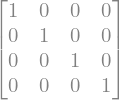

-γ0


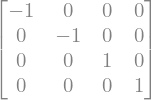

γ1


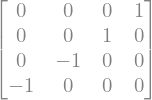

γ2_i


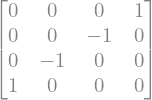

γ3


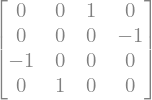

-γ5


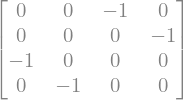

γ0γ5


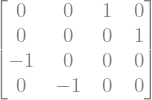

γ1γ5


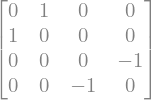

γ2γ5_i


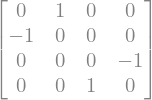

-γ3γ5


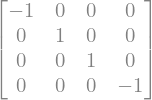

σ01_i


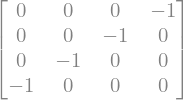

σ02


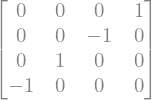

σ30_i


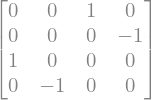

σ21


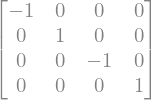

σ32


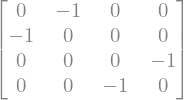

σ31


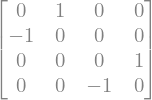

In [36]:
imatrix = sp.Matrix([[0, -1, 0, 0], [1, 0, 0, 0], [0, 0, 0, -1], [0, 0, 1, 0]])

for label, matrix in the_16.items():
    print(label)
    display(matrix)
    # print(f"i {label}")
    # display(imatrix * matrix)